Arewa Data Science Academy

Deep Learning Cohort2.0

Name: Abdulkadir Shehu Bichi

Email: abdulkadirshehubichi@gmail.com

Title: Week 3 Solution

Exercises  Solution


In [ ]:
#1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
from sklearn.datasets import make_moons

NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
data_df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


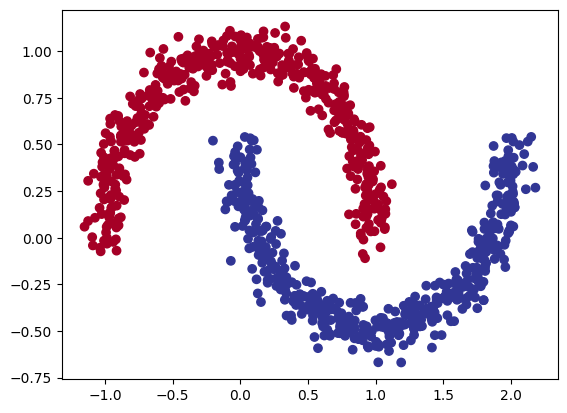

In [ ]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Turn data into tensors
import torch

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
#2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-1.0590e-01,  8.2890e-02],
                      [-3.6540e-01,  1.2246e-01],
                      [ 3.8158e-01,  5.2743e-04],
                      [-1.7187e-01,  2.7501e-01],
                      [ 9.1346e-02,  3.4469e-02],
                      [-6.8783e-01, -6.7637e-01],
                      [-6.2174e-01, -2.7601e-02],
                      [ 6.0629e-01, -5.2855e-01],
                      [ 3.8880e-01,  4.8080e-01],
                      [ 6.2566e-01,  2.0107e-02]])),
             ('layer1.bias',
              tensor([-0.0374,  0.0879,  0.4310,  0.1901, -0.1934,  0.0628, -0.2394,  0.1817,
                      -0.4759,  0.4832])),
             ('layer2.weight',
              tensor([[-0.2542, -0.2440, -0.1398, -0.2197, -0.0924, -0.0744,  0.1398, -0.2487,
                       -0.0391,  0.0323],
                      [ 0.0544,  0.2098, -0.1078, -0.1874, -0.0816, -0.2272,  0.2862, -0.3040,
                        0.2984, -0.25

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-1.0590e-01,  8.2890e-02],
                      [-3.6540e-01,  1.2246e-01],
                      [ 3.8158e-01,  5.2743e-04],
                      [-1.7187e-01,  2.7501e-01],
                      [ 9.1346e-02,  3.4469e-02],
                      [-6.8783e-01, -6.7637e-01],
                      [-6.2174e-01, -2.7601e-02],
                      [ 6.0629e-01, -5.2855e-01],
                      [ 3.8880e-01,  4.8080e-01],
                      [ 6.2566e-01,  2.0107e-02]])),
             ('layer1.bias',
              tensor([-0.0374,  0.0879,  0.4310,  0.1901, -0.1934,  0.0628, -0.2394,  0.1817,
                      -0.4759,  0.4832])),
             ('layer2.weight',
              tensor([[-0.2542, -0.2440, -0.1398, -0.2197, -0.0924, -0.0744,  0.1398, -0.2487,
                       -0.0391,  0.0323],
                      [ 0.0544,  0.2098, -0.1078, -0.1874, -0.0816, -0.2272,  0.2862, -0.3040,
                        0.2984, -0.25

In [ ]:
# 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.#
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
#  4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.1404, 0.2112, 0.0486, 0.0466, 0.0778, 0.0574, 0.0922, 0.0531, 0.0353,
        0.1978], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5350, 0.5526, 0.5121, 0.5117, 0.5194, 0.5144, 0.5230, 0.5133, 0.5088,
        0.5493], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [ ]:
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 123.1 MB/s eta 0:00:00


MulticlassAccuracy()

In [ ]:
torch.manual_seed(RANDOM_SEED)

epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69 Acc: 0.50 | Test loss: 0.69 Test acc: 0.50
Epoch: 100 | Loss: 0.40 Acc: 0.82 | Test loss: 0.42 Test acc: 0.81
Epoch: 200 | Loss: 0.26 Acc: 0.87 | Test loss: 0.26 Test acc: 0.88
Epoch: 300 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 400 | Loss: 0.23 Acc: 0.89 | Test loss: 0.23 Test acc: 0.90
Epoch: 500 | Loss: 0.21 Acc: 0.90 | Test loss: 0.21 Test acc: 0.91
Epoch: 600 | Loss: 0.19 Acc: 0.92 | Test loss: 0.18 Test acc: 0.92
Epoch: 700 | Loss: 0.15 Acc: 0.94 | Test loss: 0.14 Test acc: 0.94
Epoch: 800 | Loss: 0.11 Acc: 0.95 | Test loss: 0.10 Test acc: 0.97
Epoch: 900 | Loss: 0.07 Acc: 0.99 | Test loss: 0.06 Test acc: 0.99


In [ ]:
# 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.
# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


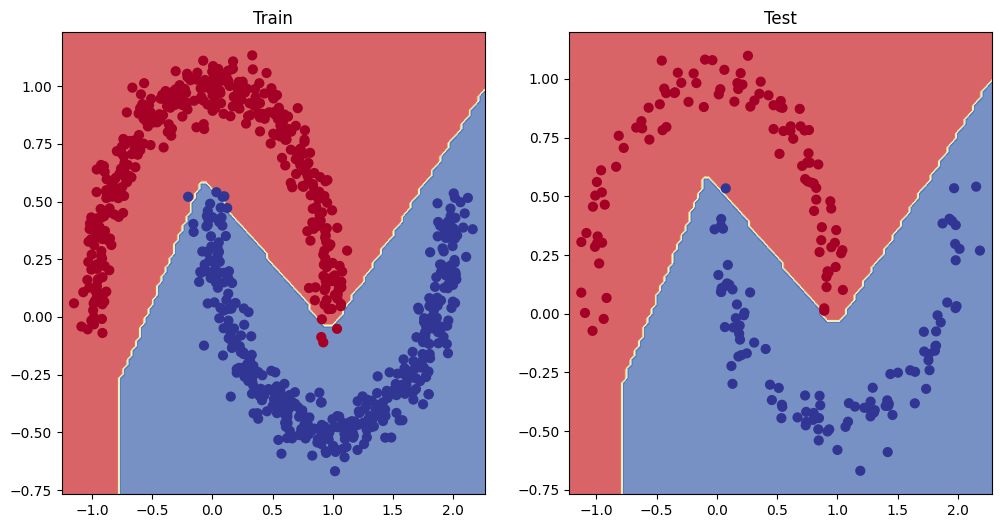

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


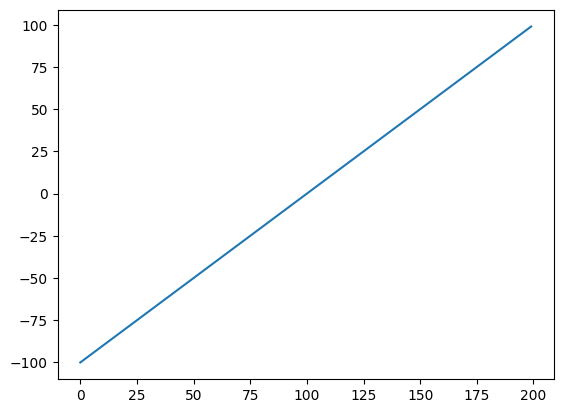

In [ ]:
 # 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)